# Linear Algebra fundamentals
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import re

import matplotlib.pyplot as plt

from unidecode import unidecode

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
pd.set_option('max_colwidth', 200)

### Scalars
---
**Definition:** Single numbers, typically representing magnitude or intensity.

In [ ]:
teoria de la entropia!! - para tocar
El principio de incertidumbre de Heisenberg - para tocar
Entropia de datos - para tocar
Complejidad espacial
Teoria de conjuntos
Aplicaciones - usos en ML
Temas superficiales
Profundizar en la parte de estadistica
Jason Brownlee - Machine Learning Mastery



In [3]:
a: float = 0.5
b: int = 2

a, b

(0.5, 2)

**Properties**

| Property | Sets that Fulfill the Property | Mathematical Formulation |
|----------|--------------------------------|-----------------------------|
| Commutativity (Addition) | **N**, **Z**, **R** | \( a + b = b + a \) |
| Commutativity (Multiplication) | **N**, **Z**, **R** | \( a * b = b * a \) |
| Associativity (Addition) | **N**, **Z**, **R** | \( (a + b) + c = a + (b + c) \) |
| Associativity (Multiplication) | **N**, **Z**, **R** | \( (a * b) * c = a * (b * c) \) |
| Additive Identity | **N**, **Z**, **R** | \( a + 0 = a \) |
| Multiplicative Identity | **N**, **Z**, **R** | \( a * 1 = a \) |
| Additive Inverse | **Z**, **R** | \( a + (-a) = 0 \) |
| Multiplicative Inverse (Non-zero) | **Z** (excluding 0), **R** (excluding 0) | \( a * 1/a = 1 \) (for \( a != 0 \)) |


**Plot**

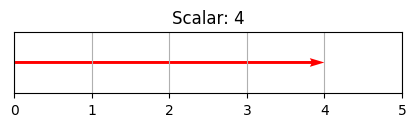

In [99]:
# Scalar value
scalar_value = 4

# Plotting the scalar value on a line
plt.figure(figsize=(5, 0.8))
# plt.quiver([0, scalar_value], [0, 0], 'ro')  # 'ro' plots a red dot
plt.quiver(
    *[0, 0], *[scalar_value, 0], angles='xy', scale_units='xy', scale=1,
    color="r")

plt.title(f'Scalar: {scalar_value}')
plt.xlim(0, 5)
plt.ylim(-1, 1)
plt.yticks([])  # Hide the y-axis
plt.grid(True)
plt.show()

### Vectors
---
**Definition** Ordered arrays of numbers, representing direction and magnitude in space.

In [5]:
def plot_vector(vectors, origin=(0, 0), title="", colors=None, xlim=5, ylim=5):
    plt.figure(figsize=(4, 4))
    for _i, _v in enumerate(vectors):
        if len(_v) == 2:
            plt.quiver(
                *origin, *_v, angles='xy', scale_units='xy', scale=1,
                color=colors[_i] if colors else f"C{_i}")
        else:
            plt.quiver(
                *_v[2:], *_v[:2], angles='xy', scale_units='xy', scale=1,
                color=colors[_i] if colors else f"C{_i}")

    plt.title(title)
    plt.xlim(0, xlim)
    plt.ylim(0, ylim)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.grid()
    plt.show()

In [6]:
v = np.array([3, 4])
w = np.array([3.5, 2])

print("Vector v: ", type(v), v)
print("Vector w: ", type(w), w)

Vector v:  <class 'numpy.ndarray'> [3 4]
Vector w:  <class 'numpy.ndarray'> [3.5 2. ]


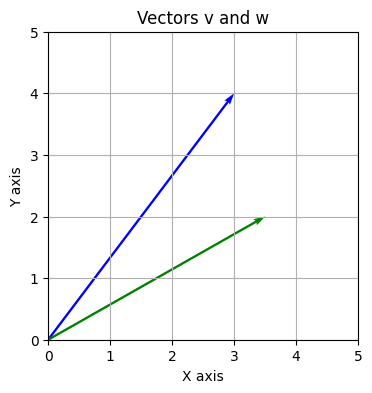

In [7]:
plot_vector([v, w], [0, 0], title="Vectors v and w", colors=["blue", "green"])

In [8]:
# Dimension of the vector
print("Dimension of v: ", v.ndim)

# Shape of the vector - number of elements in each dimension
print("Shape of v: ", v.shape)

# Length of the vector - number of elements in the first dimension
print("Length of v: ", len(v))

# Size of the vector - total number of elements
print("Size of v: ", v.size)

# Data type of the vector
print("Data type of v: ", v.dtype)

Dimension of v:  1
Shape of v:  (2,)
Length of v:  2
Size of v:  2
Data type of v:  int64


**Properties & Operations: addition, subtraction, scalar multiplication**

In [9]:
v1 = np.array([2, 3])
v2 = np.array([1, 3])

In [10]:
# Vector Magnitude
magnitude_v1 = np.linalg.norm(v1)
_norm = np.sqrt(sum([_i**2 for _i in v1]))
print(f"Magnitude of v1: {magnitude_v1:.2f} - {_norm:.2f}")

Magnitude of v1: 3.61 - 3.61


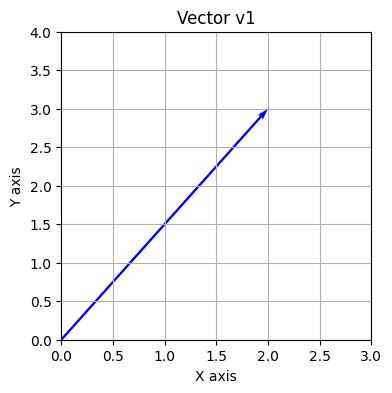

In [11]:
plot_vector([v1], [0, 0], title="Vector v1", colors=["blue"], xlim=3, ylim=4)

In [12]:
addition = v1 + v2  # Element-wise addition
print(f"Vector Addition (v1 + v2): {addition}")

Vector Addition (v1 + v2): [3 6]


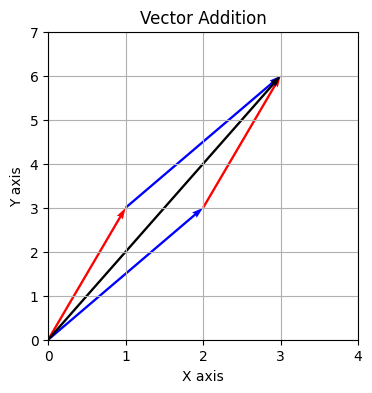

In [13]:
plot_vector(
    [v1, v2, [*v2, *v1], [*v1, *v2], v1 + v2], [0, 0],
    title="Vector Addition", colors=["blue", "red", "red", "blue", "black"], xlim=4, ylim=7)

In [14]:
# Scalar Multiplication
scalar = 2
scaled_v1 = scalar * v1  # Every element of v1 is multiplied by the scalar
print(f"Scalar Multiplication (2 * v1): {scaled_v1}")

Scalar Multiplication (2 * v1): [4 6]


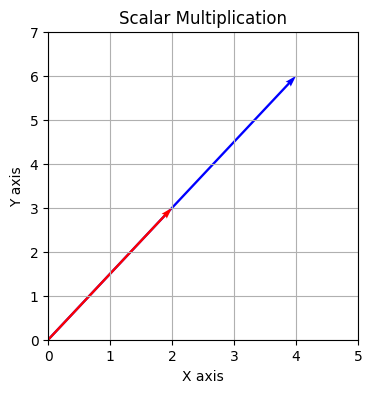

In [15]:
plot_vector([scaled_v1, v1], [0, 0], title="Scalar Multiplication", colors=["blue", "red"], xlim=5, ylim=7)

In [16]:
# Minimum and Maximum of a vector
min_v1 = np.min(v1)
max_v1 = np.max(v1)

print(f"Vector v1: {v1}\n")

print(f"Minimum of v1: {min_v1}")
print(f"Maximum of v1: {max_v1}\n")

# Index of the Minimum and Maximum of a vector
min_arg_v1 = np.argmin(v1)
max_arg_v1 = np.argmax(v1)

print(f"Index of the Minimum of v1: {min_arg_v1}")
print(f"Index of the Maximum of v1: {max_arg_v1}")

Vector v1: [2 3]

Minimum of v1: 2
Maximum of v1: 3

Index of the Minimum of v1: 0
Index of the Maximum of v1: 1


In [17]:
v3 = np.array([chr(np.random.randint(65, 91)) for _ in range(10)])

print(f"Vector v3: {v3}\n")

sorted_index_v3 = np.argsort(v3)

print(f"Indices of the sorted elements of v3: {sorted_index_v3}\n")

sorted_v3 = v3[sorted_index_v3]

print(f"Sorted elements of v3: {sorted_v3}")

Vector v3: ['Z' 'D' 'O' 'N' 'E' 'F' 'L' 'J' 'C' 'H']

Indices of the sorted elements of v3: [8 1 4 5 9 7 6 3 2 0]

Sorted elements of v3: ['C' 'D' 'E' 'F' 'H' 'J' 'L' 'N' 'O' 'Z']


In [ ]:
# Hacer la distancia euclidiana

In [18]:
# Cosine Distance - Similarity
v1 = np.array([2, 3])
v2 = np.array([3, 2])

cosine_similarity = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
print(f"Cosine Similarity between v1 and v2: {cosine_similarity:.2f}")

Cosine Similarity between v1 and v2: 0.92


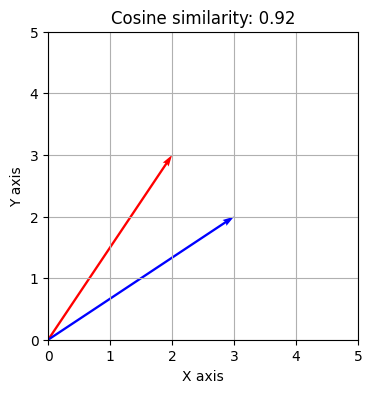

In [19]:
# plot vectors as arrows and the cosine similarity result
plot_vector([v1, v2], title=f"Cosine similarity: {cosine_similarity:.2f}", colors=["r", "b"])

In [20]:
# Dot Product
v1 = np.array([2, 3])
v2 = np.array([1, 3])

dot_product = np.dot(v1, v2)
print(f"Dot Product (v1 . v2): {dot_product}")

Dot Product (v1 . v2): 11


In [21]:
multiplication_vector = v1 * v2  # Element-wise multiplication
print(f"Vector v1: {v1}")
print(f"Vector v2: {v2}")
print(f"Element-wise Multiplication (v1 * v2): {multiplication_vector}")

Vector v1: [2 3]
Vector v2: [1 3]
Element-wise Multiplication (v1 * v2): [2 9]


**Plot:**

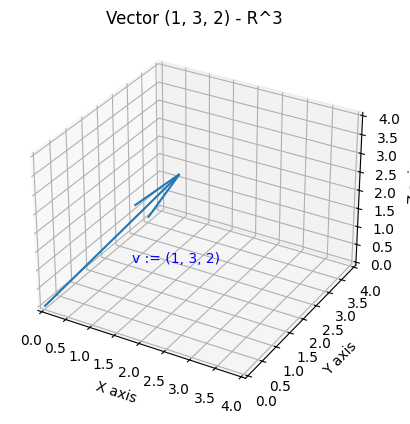

In [22]:
# plot a 3d vector
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

v = np.array([1, 3, 2])

ax.title.set_text('Vector (1, 3, 2) - R^3')
ax.quiver(0, 0, 0, v[0], v[1], v[2])
ax.text(v[0]+0.2, v[1]-2, v[2]-1, 'v := (1, 3, 2)', color='blue')
ax.set_xlim([0, 4])
ax.set_ylim([0, 4])
ax.set_zlim([0, 4])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

**Some distance metrics post:** https://rubialesalberto.medium.com/qu%C3%A9-son-las-distancias-tipos-y-c%C3%B3mo-calcularlas-con-python-2-2-f1fbef9556c2

### Matrices
---
**Definition:** Two-dimensional arrays of numbers, used to transform vectors and represent systems of linear equations.

In [23]:
A = np.array([
    [1, 3, 2],
    [5, 2, 4]
])
A

array([[1, 3, 2],
       [5, 2, 4]])

In [24]:
# Dimension of the matrix
print("Dimension of A: ", A.ndim)

# Shape of the matrix - number of elements in each dimension
print("Shape of A: ", A.shape)

# Length of the matrix - number of elements in the first dimension
print("Length of A: ", len(A))

# Size of the matrix - total number of elements
print("Size of A: ", A.size)

# Data type of the matrix
print("Data type of A: ", A.dtype)

Dimension of A:  2
Shape of A:  (2, 3)
Length of A:  2
Size of A:  6
Data type of A:  int64


In [25]:
# Minimum and Maximum of a vector
min_A = np.min(A, axis=0)  # axis=0 for column-wise
max_A = np.max(A, axis=0) # axis=0 for column-wise

# Index of the Minimum and Maximum of a vector
min_arg_A = np.argmin(A, axis=0) # axis=0 for column-wise
max_arg_A = np.argmax(A, axis=0)

print(f"Matrix A: \n{A}\n")

print(f"Column-wise\nMinimum of A: {min_A}")
print(f"Maximum of A: {max_A}\n")

print(f"Index of the Minimum of A: {min_arg_A}")
print(f"Index of the Maximum of A: {max_arg_A}")
print("---\n")
# ---
min_A = np.min(A, axis=1)  # axis=1 for row-wise
max_A = np.max(A, axis=1) # axis=1 for row-wise

print(f"Row-wise\nMinimum of A: {min_A}")
print(f"Maximum of A: {max_A}\n")

min_arg_A = np.argmin(A, axis=1) # axis=1 for row-wise
max_arg_A = np.argmax(A, axis=1)

print(f"\nIndex of the Minimum of A: {min_arg_A}")
print(f"Index of the Maximum of A: {max_arg_A}")


Matrix A: 
[[1 3 2]
 [5 2 4]]

Column-wise
Minimum of A: [1 2 2]
Maximum of A: [5 3 4]

Index of the Minimum of A: [0 1 0]
Index of the Maximum of A: [1 0 1]
---

Row-wise
Minimum of A: [1 2]
Maximum of A: [3 5]


Index of the Minimum of A: [0 1]
Index of the Maximum of A: [1 0]


**Special matrices: transponse, square, diagonal, identity, and zero matrices**

In [26]:
A = np.array([
    [1, 2, 3],
    [3, 4, 3],
    [5, 6, 3]
])

In [27]:
# Transpose of a matrix
A_transpose = A.T

print("Matrix A: \n", A)
print("\nTranspose of A: \n", A_transpose)

Matrix A: 
 [[1 2 3]
 [3 4 3]
 [5 6 3]]

Transpose of A: 
 [[1 3 5]
 [2 4 6]
 [3 3 3]]


In [28]:
# Diagonal Matrix
D = np.diag([1, 2, 3])
print("Diagonal Matrix: \n", D)

Diagonal Matrix: 
 [[1 0 0]
 [0 2 0]
 [0 0 3]]


In [29]:
# Lower Triangular Matrix
T = np.tril(A)

print("Lower Triangular Matrix: \n", T)

# Upper Triangular Matrix
U = np.triu(A)

print("\nUpper Triangular Matrix: \n", U)

Lower Triangular Matrix: 
 [[1 0 0]
 [3 4 0]
 [5 6 3]]

Upper Triangular Matrix: 
 [[1 2 3]
 [0 4 3]
 [0 0 3]]


In [30]:
# Identity Matrix
I = np.eye(3)
print("Identity Matrix: \n", I)

Identity Matrix: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [31]:
# Symmetric Matrix
S = np.array([
    [1, 2, 3],
    [2, 4, 5],
    [3, 5, 6]
])
print("\nSymmetric Matrix: \n", S)


Symmetric Matrix: 
 [[1 2 3]
 [2 4 5]
 [3 5 6]]


In [32]:
# Ones Matrix
O = np.ones((3, 3))
print("Ones Matrix: \n", O)

# Zeros Matrix
Z = np.zeros((3, 3))
print("\nZeros Matrix: \n", Z)

Ones Matrix: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Zeros Matrix: 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [33]:
# Random Matrix
R = np.random.rand(3, 3)
print("Random Matrix: \n", R)

Random Matrix: 
 [[0.24502319 0.76804762 0.71718583]
 [0.66386769 0.97193592 0.91520293]
 [0.24869554 0.15712562 0.04177673]]


**Operations: addition, subtraction, matrix multiplication, scalar multiplication**

In [34]:
A = np.array([
    [1, 2],
    [3, 4]
])

B = np.array([
    [5, 6],
    [7, 8]
])

# 4x4 matrix
C = np.array([
    [1, 2, 1, 1],
    [2, 1, 3, 2],
    [3, 1, 3, 2],
    [1, 1, 1, 1]
])

In [35]:
# Matrix Addition (Commutative Property)
addition = A + B
print(f"Matrix Addition (A + B):\n{addition}\n")

Matrix Addition (A + B):
[[ 6  8]
 [10 12]]



In [36]:
# Scalar Multiplication
scalar = 2
scaled_A = scalar * A
print(f"Scalar Multiplication (2 * A):\n{scaled_A}\n")

Scalar Multiplication (2 * A):
[[2 4]
 [6 8]]



In [37]:
# Matrix Multiplication (Element-wise)
product = np.multiply(A, B)
print(f"Matrix Multiplication (A * B):\n{product}\n")

Matrix Multiplication (A * B):
[[ 5 12]
 [21 32]]



In [38]:
# Matrix Multiplication (Row x Column)
product = A @ B
print(f"Matrix Multiplication (A * B):\n{product}\n")

Matrix Multiplication (A * B):
[[19 22]
 [43 50]]



In [39]:
print("Matrix\n\t\tA x B:")
print(f"\n{A.tolist()} x {B.tolist()}")

# Step by step matrix multiplication
for i in range(A.shape[0]):
    for j in range(B.shape[1]):
        print(f"\nRow {i} x Column {j} = {A[i,0]}*{B[0,j]} + {A[i,1]}*{B[1,j]} = {A[i,0]*B[0,j] + A[i,1]*B[1,j]}")
        for k in range(B.shape[0]):
            print(f"A[{i},{k}] * B[{k},{j}] = {A[i,k]} * {B[k,j]} = {A[i,k] * B[k,j]}")

print("\nResult:")
print(A @ B)

Matrix
		A x B:

[[1, 2], [3, 4]] x [[5, 6], [7, 8]]

Row 0 x Column 0 = 1*5 + 2*7 = 19
A[0,0] * B[0,0] = 1 * 5 = 5
A[0,1] * B[1,0] = 2 * 7 = 14

Row 0 x Column 1 = 1*6 + 2*8 = 22
A[0,0] * B[0,1] = 1 * 6 = 6
A[0,1] * B[1,1] = 2 * 8 = 16

Row 1 x Column 0 = 3*5 + 4*7 = 43
A[1,0] * B[0,0] = 3 * 5 = 15
A[1,1] * B[1,0] = 4 * 7 = 28

Row 1 x Column 1 = 3*6 + 4*8 = 50
A[1,0] * B[0,1] = 3 * 6 = 18
A[1,1] * B[1,1] = 4 * 8 = 32

Result:
[[19 22]
 [43 50]]


In [40]:
# Determinant of a Matrix
determinant_A = np.linalg.det(A)
determinant_C = np.linalg.det(C)

print(f"Determinant of A: {determinant_A:.2f}")
print(f"Determinant of C: {determinant_C:.2f}")


Determinant of A: -2.00
Determinant of C: 1.00


In [41]:
# Calculate the determinant of a matrix with laplace expansion (step by step - recursive)
def determinant(matrix):
    if matrix.size == 0:
        return 0
    if matrix.size == 1:
        return matrix[0, 0]
    if matrix.shape == (2, 2):
        return matrix[0, 0] * matrix[1, 1] - matrix[0, 1] * matrix[1, 0]

    det = 0
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            sub_matrix = np.delete(np.delete(matrix, i, 0), j, 1) # Remove row i and column j
            # print(f"\nSub-matrix of A[{i},{j}]:\n{sub_matrix}")
            det += ((-1) ** i) * matrix[0, i] * determinant(sub_matrix)

    return det

determinant_AII = determinant(A)
print(f"Matrix C:\n{C}\n")
determinant_CII = determinant(C)

print(f"Determinant of A: {determinant_AII:.2f}")
print(f"Determinant of C: {determinant_CII:.2f}")

Matrix C:
[[1 2 1 1]
 [2 1 3 2]
 [3 1 3 2]
 [1 1 1 1]]

Determinant of A: -2.00
Determinant of C: -11.00


In [42]:
# Inverse of a Matrix
inverse_A = np.linalg.inv(A)
print(f"Inverse of A:\n{inverse_A}\n")

Inverse of A:
[[-2.   1. ]
 [ 1.5 -0.5]]



In [43]:
# Calculate the inverse of a matrix with adjugate and determinant
def inverse(matrix):
    det = determinant(matrix)
    if det == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")

    adjugate = np.zeros(matrix.shape)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            sub_matrix = np.delete(np.delete(matrix, i, 0), j, 1) # Remove row i and column j
            # print(f"\nSub-matrix of A[{i},{j}]:\n{sub_matrix}")
            adjugate[i, j] = ((-1) ** (i + j)) * determinant(sub_matrix)

    print("Adjugate of A:\n", adjugate.T)
    return adjugate.T / det

inverse_A_II = inverse(A)

print(f"\nInverse of A:\n{inverse_A_II}\n")

Adjugate of A:
 [[ 4. -2.]
 [-3.  1.]]

Inverse of A:
[[-2.   1. ]
 [ 1.5 -0.5]]



In [44]:
print("Matrix A:\n", A)

Matrix A:
 [[1 2]
 [3 4]]


In [45]:
# Check if the inverse is correct
identity = A @ inverse_A
identityII = A @ inverse_A_II
print(f"Identity Matrix:\n{identity}\n")
print(f"Identity Matrix II:\n{identityII}\n")

Identity Matrix:
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]

Identity Matrix II:
[[1. 0.]
 [0. 1.]]



In [46]:
# Validating commutative property of matrix multiplication
print("Matrix\n\t\tA x B:")
print(f"\n{A.tolist()} x {B.tolist()}")
print(f"\nResult:\n{A @ B}\n")

print("Matrix\n\t\tB x A:")
print(f"\n{B.tolist()} x {A.tolist()}")
print(f"\nResult:\n{B @ A}\n")

Matrix
		A x B:

[[1, 2], [3, 4]] x [[5, 6], [7, 8]]

Result:
[[19 22]
 [43 50]]

Matrix
		B x A:

[[5, 6], [7, 8]] x [[1, 2], [3, 4]]

Result:
[[23 34]
 [31 46]]



In [47]:
# Distributive Property
# A(B + C) = AB + AC
C = np.array([[1, 1], [1, 1]])
distributive_left = np.dot(A, (B + C))
distributive_right = np.dot(A, B) + np.dot(A, C)
print(f"Distributive Property, Left:\n{distributive_left}\n")
print(f"Distributive Property, Right:\n{distributive_right}\n")


Distributive Property, Left:
[[22 25]
 [50 57]]

Distributive Property, Right:
[[22 25]
 [50 57]]



### Flatten

In [48]:
flatten_A = A.flatten()

print("Matrix A:\n", A)
print("\nFlatten A:\n", flatten_A)

Matrix A:
 [[1 2]
 [3 4]]

Flatten A:
 [1 2 3 4]


**Broadcasting**

<img src="images/broadcasting.png" alt="SQL Joins" title="Título opcional" width="40%" height="60%"/>

In [49]:
a = np.array([
    [0],
    [10],
    [20],
    [30]
])

b = np.array([
    [1, 2, 3]
])

print("Shape of a: ", a.shape)
print("Shape of b: ", b.shape)
print("\nMatrix Addition with broadcast (a + b):\n", a + b)

Shape of a:  (4, 1)
Shape of b:  (1, 3)

Matrix Addition with broadcast (a + b):
 [[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]]


In [102]:
a2 = np.array([
    [1, 2, 3],
    [1, 2, 3]
])

b2 = np.array([
    [1, 2, 3],
    [1, 2, 3],
    [1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]
])

print("\nShape of a2: ", a2.shape)
print("Shape of b2: ", b2.shape)
# print("\nMatrix Addition with broadcast (a + b2):\n", a2 + b2)

# _addition = []
# for _v in a2:
#     _addition.append(_v + b2)

# _addition = np.array(_addition)
# print("\nMatrix addition:\n", _addition)


a2 = a2[:, np.newaxis, :]
b2 = b2[np.newaxis, :, :]

print("\nShape of a2: ", a2.shape)
print("Shape of b2: ", b2.shape)
print("\nMatrix Addition with broadcast (a + b2):\n", a2 + b2)


Shape of a2:  (2, 3)
Shape of b2:  (5, 3)

Shape of a2:  (2, 1, 3)
Shape of b2:  (1, 5, 3)

Matrix Addition with broadcast (a + b2):
 [[[2 4 6]
  [2 4 6]
  [2 4 6]
  [2 4 6]
  [2 4 6]]

 [[2 4 6]
  [2 4 6]
  [2 4 6]
  [2 4 6]
  [2 4 6]]]


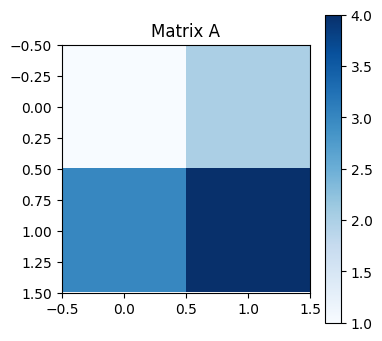

In [51]:
# Usual plot of matrices

plt.figure(figsize=(4, 4))
plt.title("Matrix A")
plt.imshow(A, cmap='Blues')
# plt.imshow(A, cmap='viridis')
plt.colorbar()
plt.show()


### Tensors
---
**Defintion:** Generalization of scalars, vectors, and matrices to higher-dimensional spaces.

In [52]:
# Define two 3D tensors
T1 = np.array([
    [
        [1, 2],
        [3, 4]
    ],
    [
        [5, 6],
        [7, 8]
    ]
])

T2 = np.array([
    [
        [2, 3],
        [4, 5]],
    [
        [6, 7],
        [8, 9]
    ]
])

In [53]:
# Dimension of the tensor
print("Dimension of T1: ", T1.ndim)

# Shape of the tensor - number of elements in each dimension
print("Shape of T1: ", T1.shape)

# Length of the tensor - number of elements in the first dimension
print("Length of T1: ", len(T1))

# Size of the tensor - total number of elements
print("Size of T1: ", T1.size)

# Data type of the tensor
print("Data type of T1: ", T1.dtype)

Dimension of T1:  3
Shape of T1:  (2, 2, 2)
Length of T1:  2
Size of T1:  8
Data type of T1:  int64


In [54]:
print("Tensor T1:\n", T1)
print("\nTensor T2:\n", T2)

Tensor T1:
 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]

Tensor T2:
 [[[2 3]
  [4 5]]

 [[6 7]
  [8 9]]]


In [55]:
# Tensor Addition
# Element-wise addition, similar to matrix addition
T_addition = T1 + T2
print(f"Tensor Addition (T1 + T2):\n{T_addition}\n")

Tensor Addition (T1 + T2):
[[[ 3  5]
  [ 7  9]]

 [[11 13]
  [15 17]]]



In [56]:
# Scalar Multiplication
# Each element of the tensor is multiplied by the scalar
scalar = 2
T_scalar_multiplication = scalar * T1
print(f"Scalar Multiplication (2 * T1):\n{T_scalar_multiplication}\n")


Scalar Multiplication (2 * T1):
[[[ 2  4]
  [ 6  8]]

 [[10 12]
  [14 16]]]



In [57]:
# Multiplication
T_element_wise_multiplication = T1 @ T2
print(f"Multiplication (T1 * T2):\n{T_element_wise_multiplication}\n")


Multiplication (T1 * T2):
[[[ 10  13]
  [ 22  29]]

 [[ 78  89]
  [106 121]]]



In [58]:
print("Tensor\n T1:\n", T1)
print("Tensor\n T2:\n", T2)

Tensor
 T1:
 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
Tensor
 T2:
 [[[2 3]
  [4 5]]

 [[6 7]
  [8 9]]]


**Representing images as arrays**  
---
Post giving an overall overview about the topic: https://www.v7labs.com/blog/image-processing-guide

In [59]:
# Load the image
image_path = 'images/lenna_test_image.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert the image from BGR to RGB

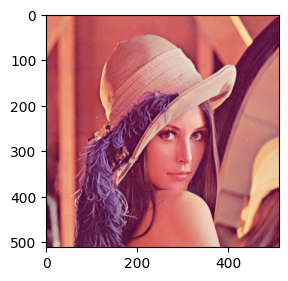

In [60]:
plt.figure(figsize=(3, 4))
plt.imshow(image)

In [61]:
print("Image Shape:", image.shape)
print("image Size:", image.size)
print("Image length:", len(image))
print("Image Data Type:", image.dtype)
print("Image Max Value:", image.max())
print("Image Min Value:", image.min())

Image Shape: (512, 512, 3)
image Size: 786432
Image length: 512
Image Data Type: uint8
Image Max Value: 255
Image Min Value: 3


In [62]:
image[:, :, 0]

array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)

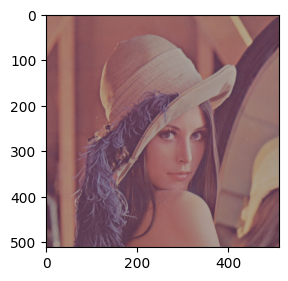

In [63]:
# Adjust brightness and contrast
alpha = 0.5  # Contrast control
beta = 50    # Brightness control

# Adjust the contrast and brightness of the image with OpenCV
# adjusted = cv2.convertScaleAbs(
#     image, alpha=alpha, beta=beta)

# Now adjust the contrast and brightness of the image with matrices operations
adjusted = np.clip(
    alpha * image + beta, 0, 255
).astype(np.uint8)

plt.figure(figsize=(3, 4))
plt.imshow(adjusted)


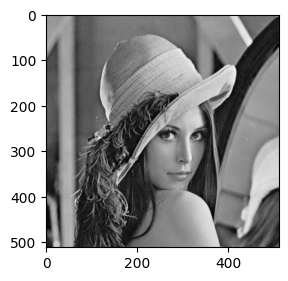

In [64]:
# Turn the image into a grayscale image with OpenCV
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(3, 4))
plt.imshow(gray_image, cmap='gray')

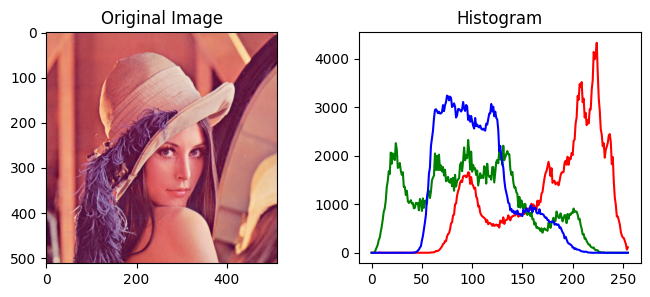

In [65]:
# Histogram of the RGB image
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Histogram')

for i, color in enumerate(['r', 'g', 'b']):
    histogram, bin_edges = np.histogram(
        image[:, :, i], bins=256, range=(0, 256)
    )
    plt.plot(histogram, color=color)

### **Representing text as arrays**

More in detail explanation: https://medium.com/@abdallahashraf90x/feature-engineering-in-nlp-a784d683bfce

In [66]:
documents = [
    "Natural language processing is a subfield of linguistics.",
    "Machine learning is is a subfield of computer science.",
    "Linguistics is the study of language."
]

# Inicializar CountVectorizer
vectorizer = CountVectorizer()

# Ajustar el vectorizador al documento y transformarlo en una matriz de términos de documento
X = vectorizer.fit_transform(documents)

# Convertir la matriz resultante a un array denso y mostrarlo
dense_matrix = X.toarray()

In [67]:
features = pd.DataFrame(dense_matrix, columns=vectorizer.get_feature_names_out())
features

,computer,is,language,learning,linguistics,machine,natural,of,processing,science,study,subfield,the
0,0,1,1,0,1,0,1,1,1,0,0,1,0
1,1,2,0,1,0,1,0,1,0,1,0,1,0
2,0,1,1,0,1,0,0,1,0,0,1,0,1


### Systems of linear equations

In [68]:
# Define the coefficient matrix A and the constant matrix (vector) B
A = np.array([[2, 4], [4, 5]])
B = np.array([18, 24])

In [69]:
# Calculate the determinant of A
determinant_A = np.linalg.det(A)

if determinant_A == 0:
    raise ValueError("Matrix A is singular and cannot be inverted.")

# Compute the inverse of A
A_inv = np.linalg.inv(A)

# Use the inverse of A to solve for x
x = A_inv.dot(B)
x


array([1., 4.])

### Get related news - Excercise 1

In [70]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove accents
    text = " ".join(
        [unidecode(word) if 'ñ' not in word else word
        for word in text.split()])

    # Delete special characters
    text = re.sub(r'[^a-z\sñ]', '', text, re.I | re.A)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def most_similar_titles(titles, cosine_similarities, n=5):

    # Sort the indexes of the most similar title
    sorted_indexes_cosine_similarities = np.argsort(cosine_similarities)[::-1][:n]
    return titles[sorted_indexes_cosine_similarities]

def vectorize_titles(titles):
    # Create a vectorizer to convert titles to frequency matrix
    vectorizer = CountVectorizer()
    vectorizer = vectorizer.fit(titles)

    titles_matrix = vectorizer.transform(titles) # Vectorize the titles
    words = vectorizer.get_feature_names_out() # Get the words

    return vectorizer, titles_matrix.toarray(), words

def vectorizer_query(vectorizer, query):
    return vectorizer.transform([query]).toarray()[0]

In [71]:
articles = pd.read_csv('data/rcn_news_2022.csv')
print(articles.shape)
articles.head()

(9022, 1)


,title
0,Salud de pele esta mejorando
1,El celular la consola de la pandemia
2,Fifa 22 vs efootball comparativa grafica y animaciones
3,Presunto caso de corrupcion dentro de la unp
4,Mas de 300 millones de casos de coronavirus son superados en el mundo


In [72]:
articles_titles = articles['title']
articles_titles = articles_titles.apply(clean_text) # Clean the titles text

# Vectorize the articles titles
vectorizer, titles_matrix, words = vectorize_titles(articles_titles)
print(titles_matrix.shape)
titles_matrix

(9022, 9677)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [73]:
# Create a DataFrame with the frequency matrix
pd.DataFrame(titles_matrix, columns=words).head(3)

,abandona,abandonada,abandonado,abandonados,abandonar,abandonara,abandone,abandono,abatido,abc,...,zona,zonas,zoo,zoom,zopiclona,zuckerberg,zuleta,zully,zumban,zuniga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Exercise - Good luck!

def cosine_similarity(titles_matrix, query_vector):
    """
        Description:
            Compute the cosine similarity between the query vector and the titles vector.
        Args:
            query_vector (numpy.ndarray): The query vector.
            titles_vector (numpy.ndarray): The titles vector.
        Returns:
            numpy.ndarray: The cosine similarity between the query and the titles.
        Expected Output:
            array([0.        , 0.        , 0.        , ..., 0.        , 0.        , 0.23570226])
    """
    ... # Your code here

In [75]:
# test phrase
query_phrase = "noticias del covid"

# Vectorize the query
query_vector = vectorizer_query(vectorizer, query_phrase)
print(query_vector.shape)
query_vector

(9677,)


array([0, 0, 0, ..., 0, 0, 0])

In [91]:
cosine_similarities = cosine_similarity(titles_matrix, query_vector)
print(cosine_similarities.shape)
cosine_similarities

(9022,)


array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.23570226])

In [77]:
most_similar_titles(articles_titles, cosine_similarities, n=5)

7701             secuelas del covid en mujeres caida del pelo
5811                contagios colombia covid de diciembre del
6283              problemas cardiacos meses despues del covid
5435    viajero del tiempo mostro fotos del campeon del mundo
1733              historias del que inspiran por noticias rcn
Name: title, dtype: object

#### Expected output  


**phrase =** noticias del covid  

**most_similar_titles - output:**  

    7701             secuelas del covid en mujeres caida del pelo  
    5811                contagios colombia covid de diciembre del  
    6283              problemas cardiacos meses despues del covid  
    5435    viajero del tiempo mostro fotos del campeon del mundo  
    1733              historias del que inspiran por noticias rcn  

### Naive Kmeans with matrix operations - Exercise 2

In [78]:
# Generate synthetic data using make_blobs
n_samples = 300
n_features = 2
n_clusters = 3
cluster_std = 2
random_state = 42
return_centers = True

Synthetic Data: (300, 2)
 [[ -7.79834899  -8.57979833]
 [ -8.60045392  -7.64922068]
 [ -0.8641078    6.57259883]
 [  4.20451643   4.17072339]
 [-10.95587626  -8.89628222]]

True Labels:
 [2 2 0 1 2]


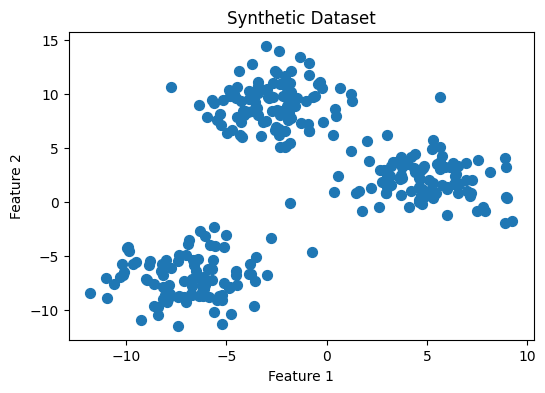

In [79]:
X, y_true, centers = make_blobs(
    n_samples=n_samples,
    n_features=n_features,
    centers=n_clusters,
    cluster_std=cluster_std,
    random_state=random_state,
    return_centers=return_centers)

print(f"Synthetic Data: {X.shape}\n", X[:5])
print("\nTrue Labels:\n", y_true[:5])

# Visualize the synthetic data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=50)

plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [80]:
# Usual KMeans usage
kmeans = KMeans(
    n_clusters=n_clusters,
    random_state=random_state)

X_train = X.copy()

kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

pred_centers = kmeans.cluster_centers_
print("Centers:", centers)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_kmeans)

print("\nCenters predicted by KMeans:\n", pred_centers)

Centers: [[-2.50919762  9.01428613]
 [ 4.63987884  1.97316968]
 [-6.87962719 -6.88010959]]

Centers predicted by KMeans:
 [[-2.75726773  9.07285344]
 [-6.88811639 -7.0878587 ]
 [ 4.85432791  2.04801886]]


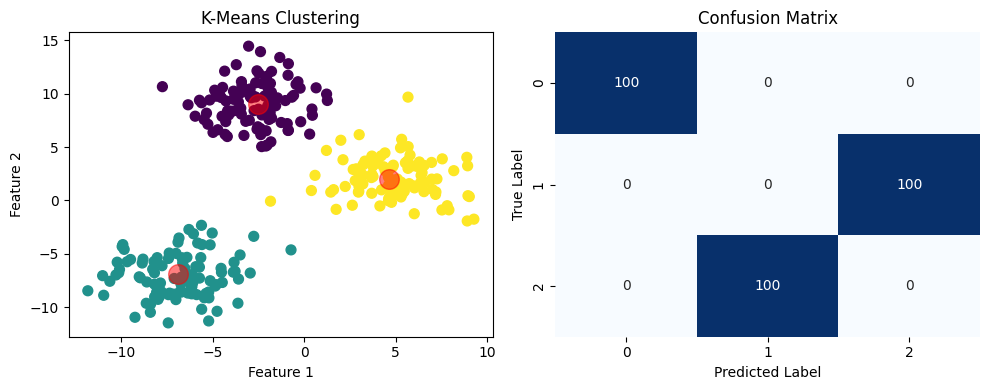

In [90]:
# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot 1: K-Means Clustering
axs[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
axs[0].scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
axs[0].set_title("K-Means Clustering")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")

# Plot 2: Confusion Matrix
sns.heatmap(
    conf_matrix, annot=True, cmap='Blues',
    cbar=False, fmt='d', ax=axs[1])

axs[1].set_title('Confusion Matrix')
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')

plt.tight_layout()  # Adjust the layout to make sure there's no overlap
plt.show()


### General kmeans algorithm (step by step explanation)

---

**Step 1:**  (Choose the Number of Clusters, K)  
The first step is to decide the number of clusters, K, into which you want to segment your dataset. This is an input parameter and may require domain knowledge, experimentation, or methods like the Elbow Method to determine.

**Step 2:**  (Initialize Centroids)
Randomly pick K data points from the dataset as the initial centroids. Alternatively, use smarter initialization methods like K-Means++ to choose initial centroids that are spread out, which often leads to better clustering.

**Step 3:**  (Assign Points to the Nearest Centroid)  
For each data point in the dataset, calculate the Euclidean distance (or another distance metric) from each centroid and assign the point to the cluster represented by the nearest centroid. This step partitions the dataset into K clusters based on the current centroid positions.

**Step 4:**  (Update Centroids)  
Once all points have been assigned to clusters, update the position of each centroid to the mean (center) of all points currently assigned to its cluster. This step moves each centroid to a position that minimizes the WCSS within its cluster, making it a better representation of its cluster's center.

**Step 5:** (Repeat Steps 3 and 4)  
Repeat the assignment of points to the nearest centroid and the updating of centroids until one of the following conditions is met:

---

#### Now is your turn hehe!

---

**Guidelines:**  
- Review and understand the provided K-Means step by step proposal.  
- Implement each of the function in the order suggest in *naive_kmeans* function.  
- Test each function individually to ensure its correctness (Divide and conquer).  
- Ensure that the final implementation correctly clusters the points and converges to a solution using above scikit learn kmean shown above.  

In [82]:
def initialize_centroids(points, k):
    """
        Description:
            Randomly initialize the centroids from the data points.
        Args:
            points (np.ndarray): Data points.
            k (int): Number of clusters.
        Returns:
            np.ndarray: Initial k centroids.
    """
    ... # Implement the function

def calculate_distance(points, centroids):
    """
        Description:
            Compute the euclidean distance between data points and centroids.
        Args:
            points (np.ndarray): Data points.
            centroids (np.ndarray): Centroids.
        Returns:
            np.ndarray: Distances between data points and centroids.
    """
    ... # Implement the function

def closest_centroid(distances):
    """
        Description:
            Obtain the index of the closest centroid, minimum distance, for each data point.
        Args:
            distances (np.ndarray): Distances between data points and centroids.
        Returns:
            np.ndarray: Index of the closest centroid for each data point.
    """
    ... # Implement the function

def update_centroids(points, closest, centroids):
    """
        Description:
            Update centroid positions as the mean of all assigned points.
        Args:
            points (np.ndarray): Data points.
            closest (np.ndarray): Index of the closest centroid for each data point.
            centroids (np.ndarray): Centroids.
        Returns:
            np.ndarray: Updated centroids.
    """
    ... # Implement the function

def naive_kmeans(points, k, max_iters):
    """
        Description:
            Repeat the process for a maximum number of iterations
        Args:
            points (np.ndarray): Data points.
            k (int): Number of clusters.
            max_iters (int): Maximum number of iterations.
        Returns:
            np.ndarray: Final centroids.
    """

    centroids = initialize_centroids(points, k)

    for _ in range(max_iters):
        distances = calculate_distance(points, centroids)
        closest = closest_centroid(distances)
        centroids = update_centroids(points, closest, centroids)

    return centroids, closest


In [83]:
# initialize_centroids test
...

In [84]:
# calculate_distance test
...

In [85]:
# closest_centroid test
...

In [86]:
# naive kmeans test

In [87]:
# # Testint using the synthetic data
# points = X.copy()
# max_iters = 1
# k = 3  # Number of clusters fixed

# centroids, naive_y_pred = naive_kmeans(points, k, max_iters)

# # Confusion Matrix
# naive_conf_matrix = confusion_matrix(y_true, naive_y_pred)

In [88]:
# # Plot the results
# fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# # Plot 1: K-Means Clustering
# axs[0].scatter(points[:, 0], points[:, 1], c=naive_y_pred, s=50, cmap='viridis')
# axs[0].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
# axs[0].set_title("K-Means Clustering")
# axs[0].set_xlabel("Feature 1")
# axs[0].set_ylabel("Feature 2")

# # Plot 2: Confusion Matrix
# sns.heatmap(
#     naive_conf_matrix, annot=True, cmap='Blues',
#     cbar=False, fmt='d', ax=axs[1])

# axs[1].set_title('Confusion Matrix')
# axs[1].set_xlabel('Predicted Label')
# axs[1].set_ylabel('True Label')

# plt.tight_layout()  # Adjust the layout to make sure there's no overlap
# plt.show()


What's next? 
- Try with another non-syntetic dataset  
- Generalized and built a more robust algorithm with different stop criteria, centroids election, etc.
- Try with other distance metrics  
- Try to do a naive implementation of another ML algorithm  
- Practice, practice, and more practice

### Additionals

---
Parenthesis to calculate Fibonacci for a basic example of recursion

In [89]:
# Calculate fibonacci series using recursion.
memo = { 1: 1, 2: 1 } # Base cases

def fibonacci(n):
    print(f"*** Calculating fib_{n}")
    if n in memo: return memo[n] # To avoid redundant calculations

    memo[n] = fibonacci(n - 1) + fibonacci(n - 2)
    print(f"--- fib_{n} = {memo[n]}\n")
    return memo[n]

n = 10
fibonacci(n)

_fib = ", ".join(list(map(str, memo.values())))
print(f"Fibonacci series of {n} numbers:\n\t{_fib}")


*** Calculating fib_10
*** Calculating fib_9
*** Calculating fib_8
*** Calculating fib_7
*** Calculating fib_6
*** Calculating fib_5
*** Calculating fib_4
*** Calculating fib_3
*** Calculating fib_2
*** Calculating fib_1
--- fib_3 = 2

*** Calculating fib_2
--- fib_4 = 3

*** Calculating fib_3
--- fib_5 = 5

*** Calculating fib_4
--- fib_6 = 8

*** Calculating fib_5
--- fib_7 = 13

*** Calculating fib_6
--- fib_8 = 21

*** Calculating fib_7
--- fib_9 = 34

*** Calculating fib_8
--- fib_10 = 55

Fibonacci series of 10 numbers:
	1, 1, 2, 3, 5, 8, 13, 21, 34, 55
